Goal: This project will aim to create a predictive model for the price of a house. It will incorporate features which have a positive correlation with the price of a home, and use those features to predict the price of a house in the US.

Data Problem: The data task is to perform feature classification and linear regression to attempt to predict the price of a house, given a set of predictive features.

Expected Results: An accurate, predictive model for determining the price of a house in the U.S.

The dataset used for this project is Housing.csv, a dataset of more than 21,000 properties listed for sale in the U.S from 2014-2015. The dataset is sourced from Kaggle: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, datetime, time

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

In [ ]:
# Read in the data
house_prices = pd.read_csv('data/Housing.csv')

# Data Overview

First, let's get some basic information about Housing.csv.

In [ ]:
# Return the info and shape of the dataset
house_prices.info()
print("Shape of the housing price data: ", house_prices.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The housing prices dataset has 21 columns and 21,613 rows of data. In other words, there are 21 potential features.

In [ ]:
house_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_prices.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Data Dictionary
The descriptions for each column have been sourced from the dataset's page on Kaggle.

```
Housing Price Dataset
1 - id : Unique identifier for each property
2 - date : Date of property listing
3 - price : Property price in currency
4 - bedrooms : Number of bedrooms
5 - bathrooms : Number of bathrooms
6 - sqft_living : Living area size in square feet
7 - sqft_lot : Total lot size in square feet
8 - floors : Number of floors
9 - waterfront : Indicates if property has waterfront view (0 for no, 1 for yes)
10 - view : Quality level of property view (0 to 4)
11 - condition : Overall condition rating (1 to 5)
12 - grade : Overall grade rating (1 to 13)
13 - sqft_above : Living area above ground level in square feet
14 - sqft_basement : Basement area in square feet
15 - yr_built : Year property was built
16 - yr_renovated : Year property was last renovated (0 if never)
17 - zipcode : Property location zip code
18 - lat : Latitude coordinate of property location
19 - long : Longitude coordinate of property location
20 - sqft_living15 : Living area size of 15 nearest properties in square feet
21 - sqft_lot15 : Lot size of 15 nearest properties in square feet







# Data Preparation

Here, the data will be checked for duplicate values, null values, and any other discrepancies in the data to be corrected.



## Duplicates





The presence of an "id" column implies a unique identifier for each row. Does every entry in the dataset have a unique id? Let's check id to see if there are any duplicate values.

In [ ]:
# Return the number of duplicate values in id
duplicates_in_id = house_prices['id'].duplicated().sum()
print("Number of duplicate values in the 'id' column: ", duplicates_in_id)

Number of duplicate values in the 'id' column:  177


There are 177 duplicate entries in id.

In [ ]:
# Show the duplicate values in id
house_prices[house_prices['id'].duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


Furthermore, some of the duplicate ids are included multiple times, bringing the total number of entries with duplicate ids to 353.

*What do these duplicates mean?*


*   In the context of housing prices and real estate, this implies that a house has been listed for sale multiple times. Indeed, glancing at the data above, the duplicate ids have different "date" and "price" values.



*What should be done about the duplicates?*


*   Well, these "duplicate" entries are not truly duplicates, and instead are unique listings. If there are duplicate ids in the data, it just indicates a property was sold multiple times. Thus, they should *not* be removed, and should be kept in the data as-is.



## Missing values

In [ ]:
# Check the data for missing (null) values
house_prices.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


There are no null entries in the house prices dataset.

## Changing datatypes

Let's review the datatype of each column.

In [ ]:
# Show the datatypes of each column
house_prices.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


All of the columns seem to have an appropriate datatype, except for "date." This column is an object, and as is standard for date/time values, it should be converted to a datetime type for easier manipulation.

In [ ]:
# Convert the date column from object to datetime
house_prices['date'] = pd.to_datetime(house_prices['date'])

In [ ]:
# Verify the column was changed successfully
house_prices.dtypes

,0
id,int64
date,datetime64[ns]
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [ ]:
# Ensure the data looks okay
house_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Drop unnecessary columns for modeling

Our goal is to create a predictive model for the price of a house. Therefore, columns which intuitively do not affect price (e.g. id), and columns which cannot easily be quantified (zipcode, lat, long) should be dropped from the dataframe we will use for our baseline model.

In [ ]:
# Create a new dataframe, with the unnecessary columns dropped
house_prices_model = house_prices.drop(columns=['id', 'zipcode', 'lat', 'long'])

In [ ]:
house_prices_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  sqft_living15  2161

# Exploratory Data Analysis

First, let's look at the 'date' column to determine basic info about the ages of the houses in the dataset.

In [ ]:
# Show the average date for housing_prices_model
print("The average date is", house_prices_model['date'].mean())

# Return the minimum and maximum dates
print("The minimum date is", house_prices_model['date'].min())
print("The maximum date is", house_prices_model['date'].max())

The average date is 2014-10-29 04:38:01.959931648
The minimum date is 2014-05-02 00:00:00
The maximum date is 2015-05-27 00:00:00


The 'date' column is the date the property was listed. The most recently-listed house was in 2015, whereas the oldest listed house was in 2014.

In [ ]:
# Return the mean, median, minimum, and maximum housing price
print("The mean housing price is", house_prices_model['price'].mean())
print("The median housing price is", house_prices_model['price'].median())
print("The minimum housing price is", house_prices_model['price'].min())
print("The maximum housing price is", house_prices_model['price'].max())

The mean housing price is 540088.5766899551
The median housing price is 450000.0
The minimum housing price is 75000.0
The maximum housing price is 7700000.0


In [ ]:
# Let's do the same for sqft_living...
print("The mean sqft_living is", house_prices_model['sqft_living'].mean())
print("The median sqft_living is", house_prices_model['sqft_living'].median())
print("The minimum sqft_living is", house_prices_model['sqft_living'].min())
print("The maximum sqft_living is", house_prices_model['sqft_living'].max())
# ...and for floors
print("\nThe mean floors is", house_prices_model['floors'].mean())
print("The median floors is", house_prices_model['floors'].median())
print("The minimum floors is", house_prices_model['floors'].min())
print("The maximum floors is", house_prices_model['floors'].max())

The mean sqft_living is 2079.8997362698374
The median sqft_living is 1910.0
The minimum sqft_living is 290
The maximum sqft_living is 13540

The mean floors is 1.4943089807060566
The median floors is 1.5
The minimum floors is 1.0
The maximum floors is 3.5


## Visualizations

### Heatmap

A heatmap will be useful in conducting a preliminary analysis of which features have the highest correlations with price.

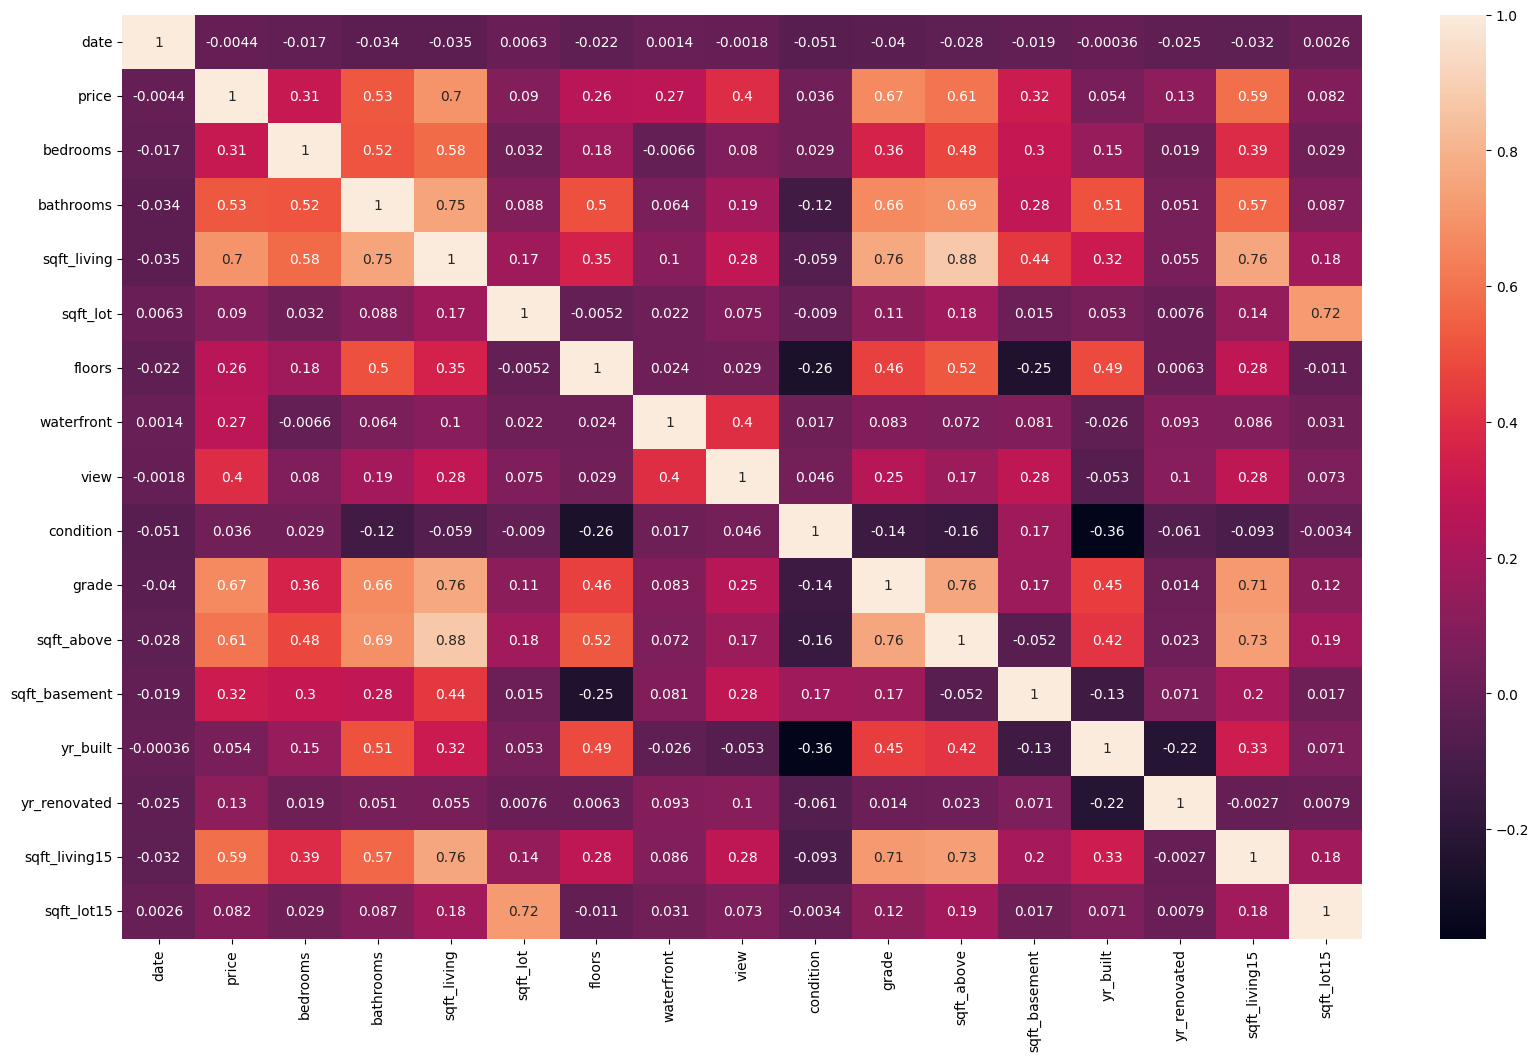

In [ ]:
# Create a heatmap for the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(house_prices_model.corr(), annot=True)
plt.show()

Looking at the heatmap, the features which show the highest positive correlation with price (>0.5) are:


* sqft_living: 0.7
* grade: 0.67
* sqft_above: 0.61
* sqft_living15: 0.59
* bathrooms: 0.53





Additionally, only one feature has a negative correlation with price.

* date: -0.0044

### Scatterplots for highest-correlated features

In order to analyze the relationship between the five-highest correlated features above, scatter plots will prove effective.

Text(0, 0.5, 'price')

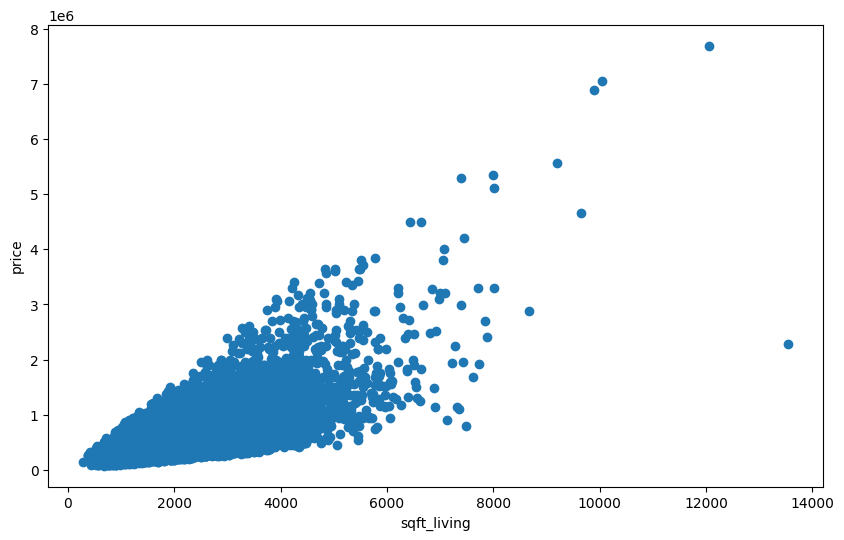

In [ ]:
# sqft_living vs. price
plt.figure(figsize=(10, 6))
plt.scatter(house_prices_model['sqft_living'], house_prices_model['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')


Text(0, 0.5, 'price')

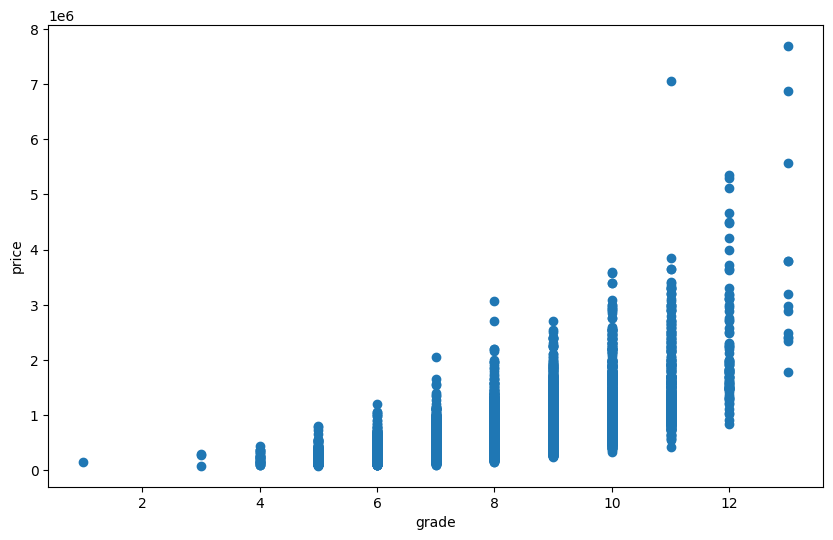

In [ ]:
# grade vs price
plt.figure(figsize=(10, 6))
plt.scatter(house_prices_model['grade'], house_prices_model['price'])
plt.xlabel('grade')
plt.ylabel('price')

Text(0, 0.5, 'price')

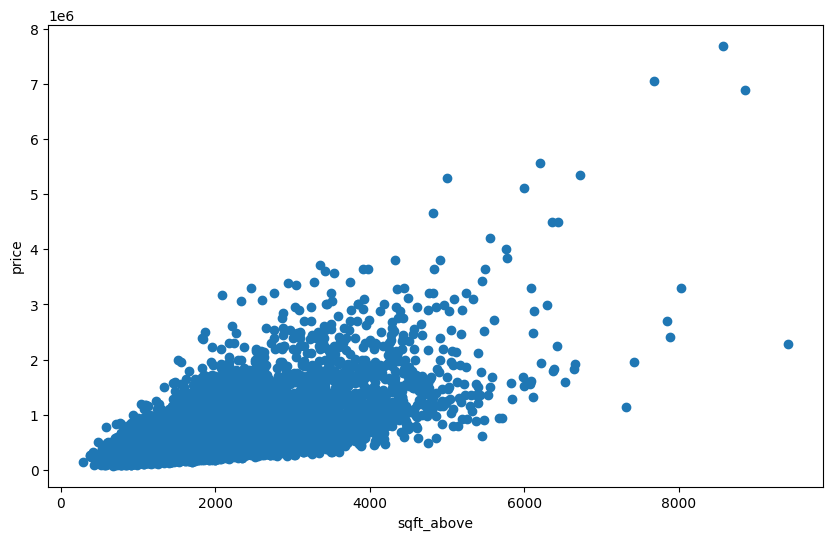

In [ ]:
# sqft_above vs. price
plt.figure(figsize=(10, 6))
plt.scatter(house_prices_model['sqft_above'], house_prices_model['price'])
plt.xlabel('sqft_above')
plt.ylabel('price')

Text(0, 0.5, 'price')

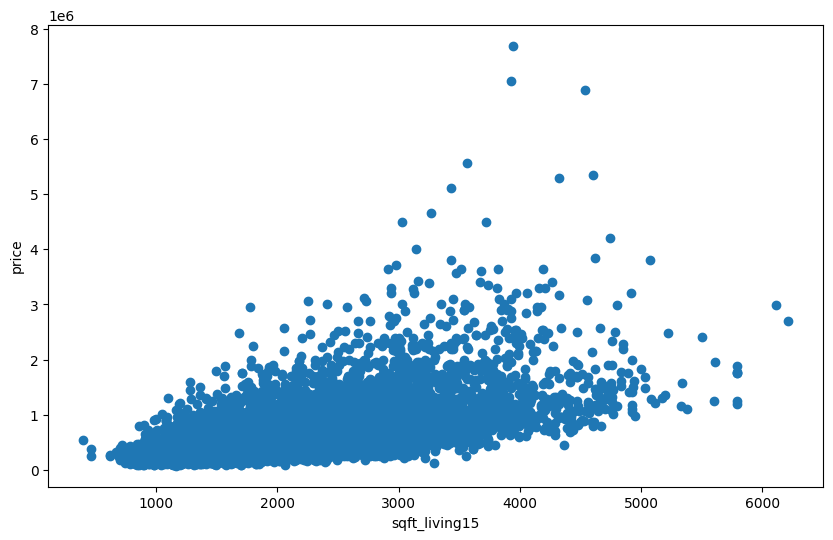

In [ ]:
# sqft_living15 vs price
plt.figure(figsize=(10, 6))
plt.scatter(house_prices_model['sqft_living15'], house_prices_model['price'])
plt.xlabel('sqft_living15')
plt.ylabel('price')

Text(0, 0.5, 'price')

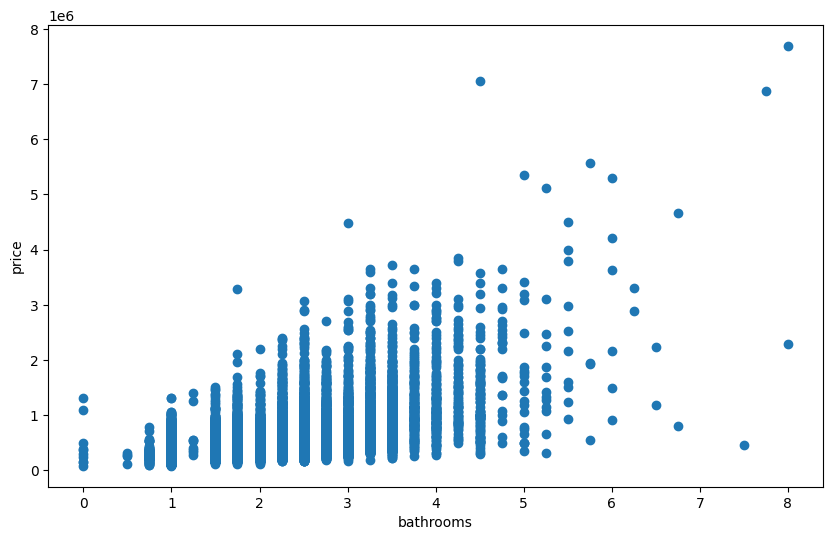

In [ ]:
# bathrooms vs price
plt.figure(figsize=(10, 6))
plt.scatter(house_prices_model['bathrooms'], house_prices_model['price'])
plt.xlabel('bathrooms')
plt.ylabel('price')

These visualizations reiterate the findings from the heatmap: the most highly-correlated features for price are sqft_living and grade. These two features, according to their respective scatter plots, exhibit an almost perfectly linear positive relationship to price.

# Modeling

Keeping in mind the goal of this project--to predict housing prices using correlated features--and the continuous nature of the price variable, the choice of a baseline model is clear.  linear regression should be used to arrive at a baseline model which can predict the price (y) given a set of features (X).

Furthermore, a single feature will be chosen and evaluated to determine if it is predictive for price.

## Linear regression

### Selecting a feature

In [ ]:
# What feature has the highest positive correlation with price?
# We already know the answer, but this time, let's use .corr to tell us
highest_corr = house_prices_model.corr()[['price']].nlargest(columns = 'price', n = 2).index[1]

print(highest_corr)

sqft_living


This result is consistent with the findings from our Exploratory Data Analysis. sqft_living will be used to train our baseline model.

### Creating the baseline model

In [ ]:
# Define X and y
# The target, y, is price, and the feature, X, is sqft_living
#X=house_prices_model.drop("price", axis = 1)
X=house_prices_model[['sqft_living']]
y=house_prices_model['price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Return the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train), type(y_train))

(17290, 1)
(4323, 1)
(17290,)
(4323,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a baseline to compare our predictions to, before creating the linear regression model
# Fill in the baseline training and testing sets with the simple mean of the price column
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)

# Return the MSE for both
print(f'Baseline MSE for training data: {mse_baseline_train}')
print(f'Baseline MSE for testing data: {mse_baseline_test}')

Baseline MSE for training data: 130648275408.54329
Baseline MSE for testing data: 151176712256.85657


In [ ]:
# Instantiate a linear regression model, using our target feature sqft_living, and fit it to X1 and y_train
X1 = X_train[['sqft_living']]
lr = LinearRegression().fit(X1, y_train)

## Evaluating the linear regression model

In [ ]:
# Calculate the MSE of the model
model_1_train_mse = mean_squared_error(y_train, lr.predict(X1))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test[['sqft_living']]))
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

# Calculate MAE and print
model_1_train_mae = mean_absolute_error(y_train, lr.predict(X1))
model_1_test_mae = mean_absolute_error(y_test, lr.predict(X_test[['sqft_living']]))
print(f'Train MAE: {model_1_train_mae: .2f}')
print(f'Test MAE: {model_1_test_mae: .2f}')

# Calculate the r-squared
train_model_rsquared = lr.score(X1, y_train)
test_model_rsquared = lr.score(X_test[['sqft_living']], y_test)
print(f'Train R^2: {train_model_rsquared: .2f}')
print(f'Test R^2: {test_model_rsquared: .2f}')

Train MSE:  66319281157.07
Test MSE:  76484978920.31
Train MAE:  172364.22
Test MAE:  177867.51
Train R^2:  0.49
Test R^2:  0.49


This isn't a bad model for a baseline. The r-squared values indicate the model explains 49% of the variability in the data.

Next, let's use our model to actually predict the price. These predicted values will then be compared to the actual values in the original dataset.

In [ ]:
# Create a dataframe that includes sqft_living and the newly predicted price from the linear regression model
predictions_df = X_test[['sqft_living']].copy()
predictions_df['predicted_price'] = lr.predict(X_test[['sqft_living']])

In [ ]:
# Merge the predictions dataframe and the original dataframe for comparison
house_prices_with_predictions = pd.merge(house_prices_model, predictions_df[['predicted_price']], left_index=True, right_index=True, how='left')
# Add another column that is simply (predicted price - price)
house_prices_with_predictions['difference'] = house_prices_with_predictions['predicted_price'] - house_prices_with_predictions['price']

In [ ]:
# From the newly created dataframe, show the price, sqft_living, and predicted_price columns, and predicted price minus price, with no null values
house_prices_with_predictions[['price', 'sqft_living', 'predicted_price', 'difference']].dropna()

,price,sqft_living,predicted_price,difference
3,604000.0,1960,505928.792328,-98071.207672
6,257500.0,1715,437438.016043,179938.016043
17,485000.0,1600,405289.284318,-79710.715682
31,280000.0,1190,290672.066862,10672.066862
34,322500.0,2060,533884.211220,211384.211220
...,...,...,...,...
21580,594866.0,2780,735163.227241,140297.227241
21581,625000.0,2780,735163.227241,110163.227241
21585,270000.0,1870,480768.915326,210768.915326
21608,360000.0,1530,385720.491094,25720.491094


Text(0, 0.5, 'Difference from Predicted Price')

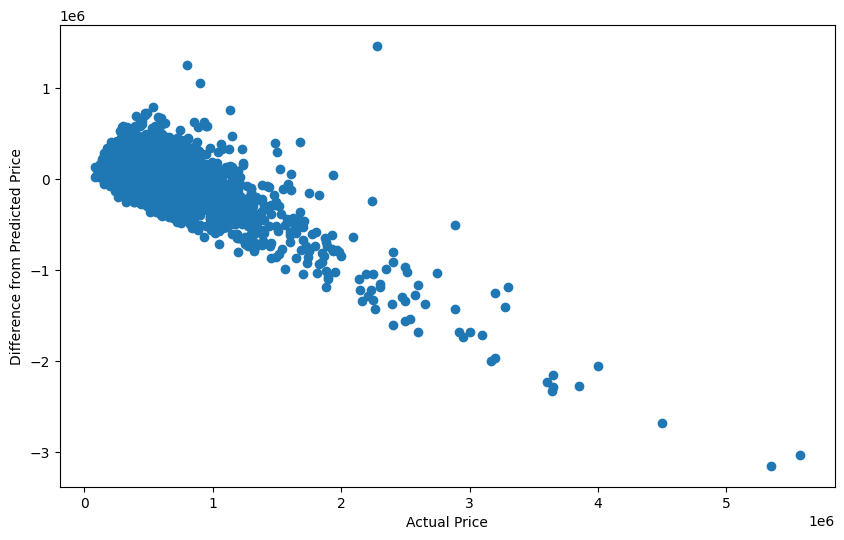

In [ ]:
# Visualize the differences between predicted and actual price
plt.figure(figsize=(10, 6))
plt.scatter(house_prices_with_predictions['price'], house_prices_with_predictions['difference'])
plt.xlabel('Actual Price')
plt.ylabel('Difference from Predicted Price')

# Conclusion

The baseline linear regression model, which was only trained on sqft_living, exhibited the following evaluation metrics:


* Train MSE:  66319281157.07
* Test MSE:  76484978920.31
* Train R^2:  0.49
* Test R^2:  0.49

For a dataset that has multiple continuous features, several of which have a positive correlation with price, this is a fine result. The baseline model explains 49% of the variance in the original data; that is, our baseline model is already 49% accurate.

To improve the accuracy and predictive power of our model, several approaches can be taken.



1. Include more features. We only looked at sqft_living, but as highlighted by our exploratory data analysis process, four other features exhibited a strong positive correlation with price. Including too many features does run the risk of overfitting the data by increasing model complexity, but a baseline model like this needs to be made more complex if our goal is to maximize predictive accuracy.
2. Re-introduce the locational features (zipcode, lat, long). It may suffice to just include the zipcode, and to map these zipcodes to their respective locations in the U.S. This will introduce a categorical feature into our model, therefore increasing model complexity--but possibly helping us to arrive at a highly accurate model for predicting a house's price.

In the final part of this project, these approaches will be taken to fine-tune our model and answer our original question: what drives the price of a house in the United States?


